# AMAT502:  Lecture 17

March 19, 2019.

Michael Lamoureux

In [ ]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from pywt import *
from matplotlib.pyplot import *
from IPython.display import IFrame
from IPython.display import Audio, display

## Outline 


- Review of 1D signals 
 - functions as signals
 - sampling a signal
 - vector space $(a_0,a_1,a_2,\ldots,a_N)$
 - plus, minus, times, divide
 - convolutions
 - polynomials $A(z) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots + a_N x^N$
 - evaluate on complex circle $z = e^{2\pi i \theta}$
 - Fourier transform $\hat{a}(\theta) = A(e^{2\pi i \theta})$
- New stuff
 - aliasing
 - Shannon Sampling Theorem
 - convolution and products via Fourier transform
 - energy, inner product
 - graph some examples (convolution and Fourier transforms)
 - Discrete Fourier transform
 - Fast Fourier transform - DO THIS
 - circular convolution - DO THIS
 - convolution as a matrix  - DO THIS
- Repeat for 2D signals
- Application to images, photoshop
- General results for Fourier transforms 
- Filter design





## Important note

I'll probably do more details in class, so you might want to add to these basic notes.

## Review of 1D signals

**Functions as signale.** We start with a function $f(t)$ which represents some data. It might be a signal from a microphone, from a geophone, from a temperature sensor, and so on. 

**Sampling.** To store it in a computer, we can't evaluate at every time. So we **sample** the signal at times $t_0,t_1,t_2,\ldots.$ This gives values $a_0 = f(t_0), a_1 = f(t_1), a_2 = f(t_2)$ and so on. 

Typically, the time samples are evenly spaced and we write $t_n = n\Delta t$.

Here is a quick plot of the sine function, plotted at discrete points separated by $\Delta t = 0.5$.

Text(0.5, 1.0, 'A sine function sampled with delta t = 0.5')

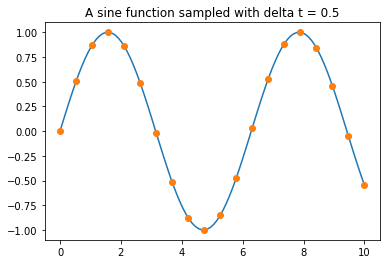

In [107]:
t = linspace(0,10,100);
tk = linspace(0,10,20);
ak = sin(tk)
plot(t,sin(t),tk,sin(tk),'o');
title("A sine function sampled with delta t = 0.5")

**Vector space.** The samples $(a_0,a_1,a_2,\ldots, a_N)$ is a vector space, under coordinate-wise addition, subtraction and multiplication by scalars. You can also multiply and divide coordinate-wise, which makes this a function space. 

**Convolution.** The convolution of two vectors $(a_0,a_1,a_2,\ldots, a_N)$, $(b_0,b_1,b_2,\ldots, b_N)$ is given by the formula
$$c = a*b$$
where
$$c_k = \sum_j a_{k-j}b_j.$$
This may look odd the first time you see it, but it is exactly how you multiply polynomials. If it doesn't make sense to you, stare at the formula until you understand how to compute it. This turns the vector space into an **algebra** under convolution. Note, however, the length of the vectors get longer as you convolve them together.

**Exercise.** 
- compute the convolution of $(1,1,1,0,0)$ with $(1,1,1,0,0,0)$
- compute the convolution of $(1,2,3,4,5)$ with $(1,1,1,1,1,1)$
- compute the convolution of $(1,1,1,1,1)$ with $(1,-1,1,-1,1,-1)$
- compute the convolution of $(1,1,1,1,1)$ with $(1,0,0,0,0,0)$

Here is some code to convolve two constant sequences. Notice the change in lengths. Also notice the result is a triangle with a flat top. Why does it have a flat top?

(Hint: think about computing the convolution using the flip-and-shift method mentioned in class.)

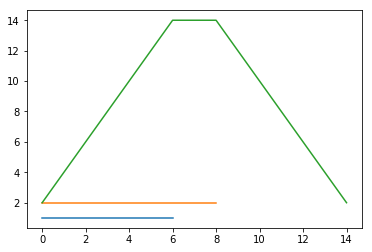

In [78]:
a = array([1,1,1,1,1,1,1])
b = 2*array([1,1,1,1,1,1,1,1,1])
c = convolve(a,b)
plot(range(len(a)),a,range(len(b)),b,range(len(c)),c);

**Polynomials.** Given a sequence $a = (a_0,a_1,a_2,\ldots, a_N)$, we can write down a polynomial in variable $z$ as
$$A(z) = a_0 + a_1 z + a_2 z^2 + a_3 z^3 + \cdots a_n z^N.$$
You can think of this as a polynomial on the complex plane.

You should check with a few examples that convolution and polynomial multiplication agree. So, if we have and convolution $c = a*b$, then the corresponding polynomials just multiply together like polynomials
$$C(z) = A(z) B(z).$$

**On the complex unit circle.** The unit circle in in the complex plane is given by exponentials $e^{2\pi i \theta}.$ So we can evaluate the polynomial on these points, to get a function from the interval $[0,1]$ to t=complex numbers,
$$\theta \mapsto A(e^{2\pi i \theta}).$$

**Fourier transform.** This map from the interval to the complex numbers is called the Fourier transform of sequence 
$a = (a_0,a_1,a_2,\ldots, a_N).$ We usually write the Fourier transform with a hat, so
$$\hat{a}(\theta) = A(e^{2\pi i \theta}).$$
So, $a$ is a sequence and $\hat{a}$ is a function on the interval $[0,1]$.  And remember, it is not complicated -- just a polynomial evaluated on the unit circle in the complex plane.

**Examples.** Here are a few sequences and their Fourier transform. The FT is complex, so we have to plot its real and imaginary parts. 

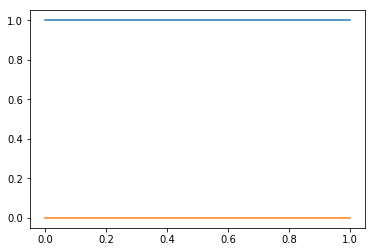

In [127]:
a = array([1,0,0,0,0])  # a delta pulse. A single one

def ahat(theta):
    sum = 0
    for k in range(len(a)):
        sum = sum + a[k]*exp(2*pi*1j*theta*k)
    return sum

t = linspace(0,1,100)
plot(t,real(ahat(t)),t,imag(ahat(t)));
    

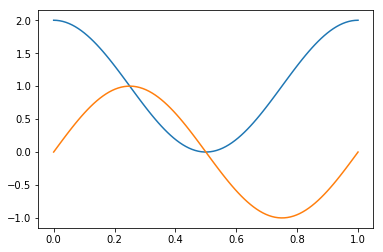

In [80]:
a = array([1,1,0,0]) # Two nonzero entries

def ahat(theta):
    sum = 0
    for k in range(len(a)):
        sum = sum + a[k]*exp(2*pi*1j*theta*k)
    return sum

t = linspace(0,1,100)
plot(t,real(ahat(t)),t,imag(ahat(t)));
    

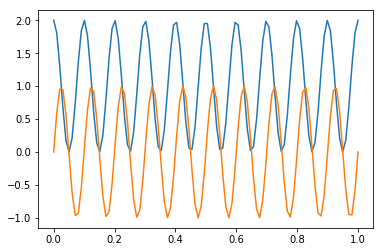

In [81]:
a = array([1,0,0,0,0,0,0,0,0,0,1]) # Two non-zero entries, separated by zeros

def ahat(theta):
    sum = 0
    for k in range(len(a)):
        sum = sum + a[k]*exp(2*pi*1j*theta*k)
    return sum

t = linspace(0,1,100)
plot(t,real(ahat(t)),t,imag(ahat(t)));
    

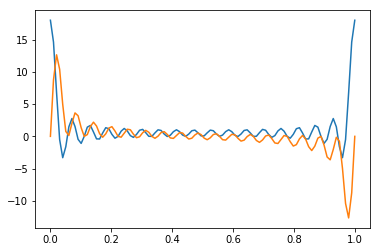

In [82]:
a = array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])  ## A bunch of ones

def ahat(theta):
    sum = 0
    for k in range(len(a)):
        sum = sum + a[k]*exp(2*pi*1j*theta*k)
    return sum

t = linspace(0,1,100)
plot(t,real(ahat(t)),t,imag(ahat(t)));
    

**Convolution and Fourier transform.** *Theorem:* a convolution becomes a product under the Fourier transform.

That is, if sequences $c = a*b$, then $\hat{c} = \hat{a}\cdot\hat{b}$, where the sybol $*$ means convolution, while $\cdot$ means multiplication of functions.

The proof is just that the polynomials multiply, and the Fourier transform just evaluates the polynomials as functions on the unit circle in the complex plane. 



## New Stuff

**Aliasing.** This comes from the word **Alias** which means to disguise your name with a fake names. In signal processing, it is a fact that when you sample a signal, you lose information. So one signal may appear as another. 

For instance, if we sample a sine wave too slowly, we can't tell apart a slow sine wave from a fast sine wave.

In the following example, the blue sine wave and the orange sine wave have different frequencies, but the samples (green dots) are exactly the same for both. So we are sampling too slowly, can't tell fast from slow.

You might want to check that the frequencies of the sine waves here are 2 Hz and 6 Hz, while the sampling rate is 8 samples per second. Notice that 4=8/2 is exactly in the middle of 2 and 6. This is not an accident! We say the 6Hz signal is aliased to a 2 Hz signal.



Text(0.5, 1.0, 'A sine function sampled with delta t = 0.125')

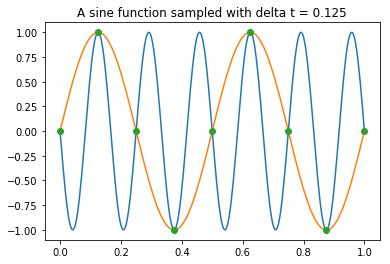

In [109]:
t = linspace(0,1,300);
tk = linspace(0,1,9);
ak = sin(2*pi*tk)
plot(t,-sin(2*pi*6*t),t,sin(2*pi*2*t),tk,sin(2*pi*2*tk),'o');
title("A sine function sampled with delta t = 0.125")

**Aliasing in sound.** Here is some code to play with. Sample rate is 8000. Set freq to 100, 2000, 3000, 4000, 5000,6000, 7000. You will notice that 3000 sounds the same as 5000. This is aliasing. 

Theorem: A sine wave with frequency above Fs/2 (half the sample rate) will sound like a sine wave with frequency between 0 and Fs/2.

Fs/2 is called the Nyquist rate.

In [110]:
## Code for 1D signals.
## Let remember how to do sound

Fs = 80100
x = linspace(0,1,Fs)
freq = 1000
y = sin(2*pi*freq*x)
display(Audio(data=y, rate=Fs))

**Triangle.** The connection between the true frequency and the aliased frequence follows a triangular pattern.

This comes from the algebraic result that $\sin(t + \pi) = -\sin(t).$ We can do the algebra to show this, but a picture is nicer.


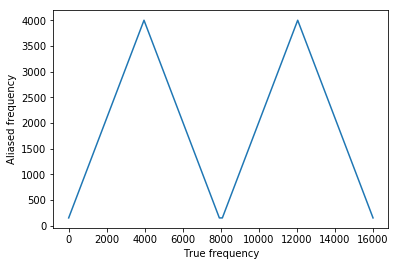

In [125]:
from scipy.signal import triang
w = concatenate((triang(51),triang(51)))
plot(linspace(0,16000,len(w)),4000*w)
xlabel("True frequency")
ylabel("Aliased frequency");

The algebra for this is as follows. We can show the sine waves of frequency $f$ and $f + F_s$ get samples as the same, when $F_s$ is the sampling rates. The sampled values for the higher frequency $f + F_s$ are given as
$$a_k = \sin(2\pi k(f + F_s)/F_s) = \sin(2\pi k(f/F_s) + 2\pi k) =  \sin(2\pi k(f/F_s) ),$$
since the sine function is $2\pi$ periodic. So the sampled values are the same as for the lower frequency $f$.

Similar algebra can be used to show a freqency $f = F_s/2 + f_0$ will alias to $f' = F_s/2 - f_0$, which explains the downwards-sloping part of the graph above. 

## Shannon sampling theorem.

States that if a signal $f(t)$ can be reconstructed exactly from its time samples $f(k\Delta t)$, where $\Delta t = 1/F_s$ if the sampling rate $F_s$ is at least twice as high as the highest frequency in the signal $f(t).$

For instance, for good quality sound, the highest frequency we want to reproduce is 20,000 cycles per second (Hz)> So our sampling rate must be at least 40,000 samles per second. For engineering reasons, high quality digital sound is sampled at 44,100 Hz, or occasionally 48,000 Hz. 

## Inner product and energy

For sequences $a = (a_0, a_1, a_2, \ldots, a_N), b = (b_0, b_1, b_2, \ldots, b_N)$, the inner product, or dot product is given by
$$\langle a,b \rangle = a_0b_0 + a_1b_1 + a_2b_2 + \cdots a_N b_N.$$
Sometimes we want to work with complex vectors, so we redefine the inner product to include a complex conjugation on the second vector:
$$\langle a,b \rangle = a_0\overline{b_0} + a_1\overline{b_1} + a_2\overline{b_2} + \cdots a_N \overline{b_N}.$$

The **Energy** of a vector is its inner product with itself
$$Energy(a) = \langle a, a \rangle,$$
and the **norm** is the square root:
$$|| a || = \sqrt{\langle a, a \rangle}.$$

As we know from linear algebra, we have some geometric inequalities
$$| \langle a,b \rangle | \leq || a || \cdot ||b ||, $$
$$ || a + b || \leq ||a|| + ||b ||.$$

**On a function space:**
For functions $f,g$ on the unit interval $[0,1]$ we can also define an inner product by integrating the two:
$$\langle f,g \rangle = \int_0^1 f(t) \overline{g(t)} \, dt.$$
Notice the complex conjugate over the $g$ function. Then we also have energy and norm:
$$Energy(f) = \langle f,f  \rangle= \int_0^1 |f(t)|^2  \, dt,$$
and
$$ || f|| = \sqrt{\langle f,f  \rangle} = \sqrt{ \int_0^1 |f(t)|^2  \, dt }.$$

It's an exercise in calculus to get the geometric inequalities
$$| \langle f,g \rangle | \leq || f || \cdot ||g ||, $$
$$ || f + g || \leq ||f|| + ||g ||.$$

## Fourier transform preserves inner products, energy and norm.

This is a theorem. The idea is easy. If we have two sequences $a$ and $b$ with Fourier transforms $\hat{a}$ and $\hat{b}$ (which are functions on the interval $[0,1]$ then
$$\langle a,b \rangle = \langle \hat{a},\hat{b} \rangle, \quad Energy(a) = Energy(\hat{a}), \quad ||a|| = ||\hat{a}||.$$

The proof is just algebra. 

For instance, for the inner product, the functions $\hat{a}\, \hat{b}$ are just polynomials in $e^{2\pi i \theta}$. When you multiply them together (with a conjugate on $\hat{b}$), you end up with a sum involving terms
$$a_j \overline{b_k} e^{2\pi i (j-k)\theta}.$$
(The -k in the exponential comes from the complex conjugate of the b terms.)

When you integrate this over the interval $[0,1]$, they all integrate to zero, since the complex exponential is just made up of sines and cosines, which integrate to zero. EXCEPT in the case where $j=k$, because then the complex exponential is constant, equal to one, so the integral we get is $a_j \overline{b_j}.$ Summing up over all $j$, we find
$$\langle \hat{a},\hat{b} \rangle = \int_0^1 \sum_{j,k} a_j \overline{b_k} e^{2\pi i (j-k)\theta} d\theta 
= \sum_j a_j \overline{b_j} = \langle a,b \rangle.$$

The energy and norm results follow immediately from the inner product result. 


## A bit of analysis.

We can let our sequences go on forever: $a = (a_0, a_1, a_2, a_3, \ldots, a_k, \ldots).$ These also form a vector space. The set of infinitely long sequence with finite energy is call the space $L^2(\mathbb{N}), $ called el-two of N. Inner products are defined the same way
$$\langle a, b \rangle = \sum_j a_j \overline{b_j}$$
as are the energy and norm. 

An analytic function $A(z)$ is defined on the open unit disk of the complex plane by the (convergent) infinite sum $$A(z) = \sum_{j=0}^\infty a_j z^j.$$
With some careful analysis, this funcion can be extended to the boundary of the unit disk, so we can define the Fourier transform as 
$$\hat{a}(\theta) = A(e^{2\pi i \theta}).$$

This function is a **measureable** function on the unit interval, so you can integrate it. The results on Fourier transform preserving inner product, energy and nor, all hold true here as well. 

Convolution is a bit tricky, but for applications, it works out. 

## Example

The sequence $a = (0,\frac{1}{1},\frac{1}{2},\frac{1}{3},\frac{1}{4},\ldots, \frac{1}{k}, \ldots)$ has finite energy since
$$\sum\frac{1}{k^2} = \frac{\pi^2}{6}.$$
The analytic function related to this is given by the sum 
$$A(z) = \sum_{k=1}^\infty \frac{z^k}{k} = -\log(1-z),$$
where we recognize this as the Taylor series expansion of the complex logarithm.

Its Fourier transform is defined everywhere on the unit circle, except at the point $z=1$. So we can actually plot this, as follows:

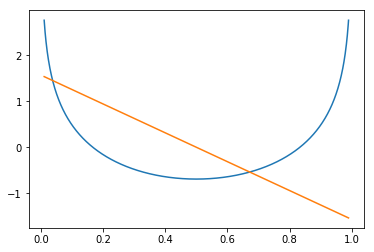

In [133]:
t = linspace (0.01,.99,1000)
z = exp(2*pi*1j*t)
ff = -log(1-z)
plot(t,real(ff),t,imag(ff));

## Discrete Fourier transform

Back to finite sequences. Take a vector $a = (a_0,a_1,a_2, \ldots, a_{N-1})$ of length N. Its FT is a function on the interval, given by the formula
$$\hat{a}(\theta) = \sum _{j=0}^{N-1} a_j e^{2\pi i j \theta}. $$

To get the Discrete Fourier transform, we just evaluate this function at $N$ uniformly distributed points on the interval, the points 
$$0, \frac{1}{N}, \frac{2}{N}, \ldots, \frac{N-1}{N}.$$
So we write
$$\hat{a}_k = \hat{a}(\frac{k}{N}) =  \sum _{j=0}^{N-1} a_j e^{2\pi i jk/N}, \mbox{ for } k =0,1,2,\ldots N-1.$$

This DFT is a linear transform from N-dimensional space, to N-dimensional space. The inverse is given by a very similar formula -- note the minus sign in the exponential, and the factor $1/N$.
$$a_j =    \frac{1}{N}\sum _{k=0}^{N-1} \hat{a}_k e^{-2\pi i jk/N}, \mbox{ for } j =0,1,2,\ldots N-1.$$




## Warning:

There are several different conventions in defining the DFT. One choice is whether to put the minus sign in the inverse transform or the forward transform. Another choices is whether to normalize with the factor $1/N$, or to use a factor of $1/\sqrt{N}$ in both forward and inverse transforms.

When using software, you should check what the convention is. 

The energy and inner product results may need to be "corrected" with that factor of $N$ or $\sqrt{N}$. You can think about this. 

## The Fast Fourier Transform

The FFT was popularized by Cooley and Tukey in 1965, although Gauss had invented it back in 1805. 

It greatly speeds up the calculation of the Discrete Fourier transform. The DFT, using the sum above, take $O(N^2)$ floating point operations, while the FFT takes only $O(N\log_2(N))$.

For for instance, wtih N= 1,000,000, the DFT would take about 1,000,000,000,000 operations. (a trillion). The FFT takes only 18,000,000 which is a speedup by a factory by 50,000 times!

The idea behind the FFT is an interesting recursion. If we write $\omega = e^{2\pi i/N}$, the DFT matrix has entries of the form $w^{jk}$ which can be factored into a product of simpler matrices.

Or, another way to see it is to separate the DFT sum into even and odd parts,
$$\hat{a}_k =  \sum _{j=0}^{N-1} a_j \omega^{jk} = \sum_{j=2n} a_j \omega^{jk} + \sum_{j=2n+1} a_j \omega^{jk}.$$
These two sums on the right can be recognized as a DFT of a vector of length only N/2 each, using the complex elemetn $\omega^2$. Rinse and repeat long(N) times and you get the result..

Well, that's the basic idea. The main point is, this is really fast!


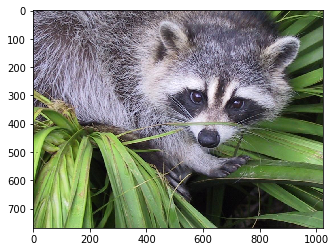

In [59]:
## Code for 2D signals

from scipy import misc
from scipy.signal import convolve2d
f = misc.face()
imshow(f);

In [4]:
shape(f)

(768, 1024, 3)

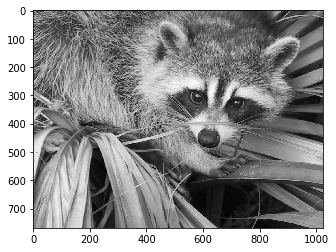

In [5]:
f1 = f[:,:,1]
imshow(f1,cmap='gray');

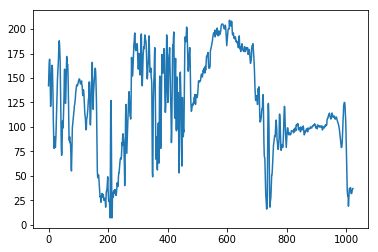

In [6]:
plot(f1[400,:]);

In [7]:
f1[400,:] = 0

ValueError: assignment destination is read-only

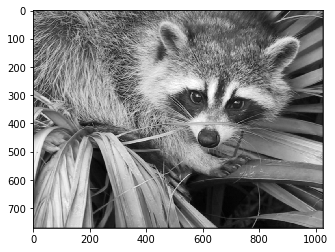

In [15]:
B = ones((3,3))
f2 = convolve2d(f1,B)
imshow(f2,cmap='gray');

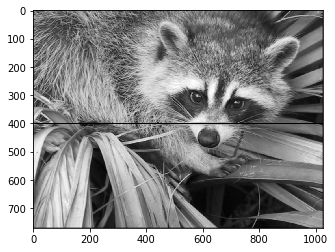

In [23]:
f2[400,:] = 0
imshow(f2,cmap='gray');

## Filter design

We can move between filters coefficients and filter reponse using the Fourier transform. Finite filters are connected to polynomials in $z$. Roots of the polynomial tell us all we need to know about the filter or polynomial. 

### Ideal lowpass, highpass filter

The idea lowpass filter looks like this:

In [ ]:
## Plot a low pass response
N=1024
f=linspace(0,0.5,N)
H = (1-sign(f-0.2))/2
plot(f,H,'-')

The frequence $f=0.2$ where the jump happens is called the cutoff frequency.

A high pass filter looks like the following: 

In [ ]:
## Plot a high pass response
N=1024
f=linspace(0,0.5,N)
H = (1+sign(f-0.2))/2
plot(f,H,'-')

Obviously we can't get straight lines using simple sums of trig functions. But we can get filter coefficients for an infinitly long convolution filter by computing Fourier coefficients

$$h_n = \int_{-0.5}^{0.5} H(\omega) e^{-2\pi i n \omega} d\omega = \int_{-0.2}^{0.2} \cos(2\pi n) d\omega = 
\frac{\sin(0.4 n \pi)}{n \pi} =0.4 \mbox{sinc}(0.4 n)$$

In [ ]:
n = arange(-20,21)
h = 0.4*sinc(0.4*n)
plot(n,h,'.')

In [ ]:
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
plot(abs(fft(hlong)))

# These ripples are called Gibbs phenomena. 

They don't go away even as as you add more terms. 

In [ ]:
nmax = 50  ## Try different values here. 10, 20, 50, 100
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
f = linspace(0,1,size(hlong))
plot(f,abs(fft(hlong)))

## Truncating with a window

What's going on here is the coefficients $h_n$ are being truncated to a finite non-zero sequence. This is the same as being mulplied by a window, in this case a function that is equal to 1 from -nmax to +nmax, and 0 othersze. The Fourier transform of this window is a sinc function, so it has the wiggles in it. As shown in this diagram:


In [ ]:
nmax = 10  # this is the half-width of the truncating window
N = 1024
N2 = N//2
f = linspace(0,1,N)
wlong = 0*f
wlong[0:2*nmax] = 1
fftlong = fft(wlong)
front = fftlong[0:N2]
back = fftlong[N2:N]
plot(f[0:N2],real(front),f[0:N2]-.5,real(back))

So these wiggles get convolved with the square shape of the ideal lowpass filter, to get the wiggly version of the lowpass filter.



In [ ]:
## Plot a low pass response
N=1024
N2 = 1024//2
f=linspace(0,1,N)
H = (1-sign(f-0.2))/2

## Look at the FT of the square window function
nmax = 10  ## Try different values here. 10, 20, 50, 100
wlong = 0*f
wlong[0:nmax] = 1
wlong[(N-nmax):nmax] = 1
fftlong = fft(wlong)
front = real(fftlong[0:N2])
back = real(fftlong[N2:N])

#3 Now the FT of the truncated filter coefficients
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
hlong = 0*linspace(0,1,N)
hlong[0:size(h)] =h

ff, axs = subplots(1,3,figsize=(15,5))
subplot(1,3,1,title='Ideal lowpass')
plot(f,H,'-')
subplot(1,3,2,title='Convolver due to window')
plot(f[0:len2],front,f[0:len2]-.5,back)
subplot(1,3,3,title='Resulting finite filter')
plot(f,abs(fft(hlong)))



## Other windows

We can try other windows. 

Here is a Gaussian. The nice thing about a Gaussian is that its FT is also a Gaussian, so we get a nice smoother.

Try different values of nmax

In [ ]:
nmax = 30
gfactor = 0.01 # factor inside the Gaussian. Try 0.1 0.01 etc
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
window = exp(gfactor*(-n**2)/nmax*nmax)
h=h*window
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
plot(abs(fft(hlong)))

## Cosine, cosine-squared windows


In [ ]:
## A cosine window
nmax = 10
gfactor = 0.01 # factor inside the Gaussian. Try 0.1 0.01 etc
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
window = cos(0.5*pi*n/nmax)
h=h*window
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
plot(abs(fft(hlong)))

In [ ]:
## A cosine squared window
nmax = 20
gfactor = 0.01 # factor inside the Gaussian. Try 0.1 0.01 etc
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
window = cos(0.5*pi*n/nmax)**2
h=h*window
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
plot(abs(fft(hlong)))

## Roots of the filter response



In [ ]:
N=1024
N2 = 1024//2
f=linspace(0,1,N)
H = (1-sign(f-0.2))/2

## Look at the FT of the square window function
nmax = 9  ## Try different values here. Don't use a multiple of 10, otherwise the polynomial has zero coefficients at the ends . 
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)

r = roots(h)
r


In [ ]:
plot(r.real,r.imag,'.')

## Comments on the zeros

Notice there are lots of zeros near the unit circle, but none near z=1 (since lowpass)

## Comparing zeros

Let's look at zeros for the hard truncated window, and then for the cosine-window truncated window.

In [ ]:
## A cosine squared window
nmax = 9
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
window = cos(0.5*pi*n/(nmax+1))**2
hw=h*window
r = roots(h)
rw = roots(hw)
plot(r.real,r.imag,'.',rw.real,rw.imag,'.')

In [ ]:
ff, axs = subplots(1,2,figsize=(15,8))
subplot(1,2,1)
plot(r.real,r.imag,'.')
xlim([-4,3])
ylim([-4,3])
subplot(1,2,2)
plot(rw.real,rw.imag,'.')
xlim([-4,3])
ylim([-4,3])


#  Roots and filters

Convolutional filters correspond to polynomial via the Z-transform. The filter reponse is given byt evaluating that polynomial on the unit circle in the complex plane. The amplitude response is given by taking the absolute value of that polynomial. Writing the polynomial as a product of linear terms 
$$c\cdot(z - r_1)(z - r_2)(z - r_3)\ldots$$ where the $r_k$ are the roots, we see the amplitude response is just the product of distances from each root $r_k$ to the point $z$ on the unit circle.

So the amplitude response is completely determined by the location of the roots of the polynomial. (Up to that scaling constant $c$.)

It's a funny fact that replacing the root $r_k$ with with reciprocal $1/r_k$ does not change the amplitude response, except for a trivial scaling factor. This is because we can write
$$ (z-r_k) = r_k(1/r_k - z)/z$$ so taking absolute values (and with $z$ on the unit circle) we have
$$ |z-r_k| = |r_k| \cdot |z-1/r_k|.$$
So the factors $(z-r_k)$ and $(z-1/r_k)$ behave the same way on the unit circle. 

So when we design a filter, we have a choice of choose a root or its reciprocal. 

Daubechies choose her roots for the lowpass filter to always be inside the unit circle. Her highpass filter has roots which are negative reciprocals, so they are outside the unit circle.

In your assignment 2, you would have noticed that Daubechies chooses multiple roots at $z=-1$ for the lowpass filter. This corresponds to a zero at Nyquist frequency, which is the normalized frequency $\omega = 1/2$, since
$$-1 = e^{2\pi i /2}.$$

## Mobius transformations and inner functions

The polynomials $(2z-1)$ and $z-2$ have roots $1/2$ and $2$ which are reciprocals, so they will be equal in modulus on the unit circle (up to a constant, but I was careful to choose the constant to be one). So
$$\frac{|2z-1|}{|z-2|} = 1 \mbox{ for all $|z|=1$.}$$

This function $R(z) = \frac{2z-1}{z-2}$ is a rational function (the **ratio** of two polynomials) and is in fact a special kind called a **linear fractional transformation** or **fractional linear transformation** as it is a ratio of tow linear polynomials. 

This is also called a Mobius transformation. It maps the unit disk in the complex plane 1-to-1 and onto itself. In this case, the point $z=1/2$ gets mapped to the origin, 

These are pretty interesting maps.

For filters, we find them interesting because we can take a polynomial, and multiply it by one of these things, to move an root from outside the unit circle o the inside of the inner circle. (This is just algebra, but it is worth thinking about for a while.) 

In complex analysis, a Blasche product is an infinite product of such Mobius transformations. They have the interesting property that they are analytic on the unit disk, and take values with modulus 1 (absolute value 1) on the unit circle. 

In engineering, these things are called all-pass filters. 

## Recursive filters
## Infinite Impulse Response (IIR) filters

We saw above some rational functions of a complex variable $z$. That is, the ratio of two polynomials. Such a function has roots (zeros of the numerator) and poles (zeros of the denominator). Turns out you have have filters with whose *transfer function* is a rational function. Which is to say the Fourier transform of the filter is a rationa function of complex variable $z$ restricted to the unit circle.

It is best to start with a very simple example.

Imagine you have input and output vectors
$$ \mathbf{x} = (x_0,x_1,x_2,x_3, \ldots)$$ and
$$ \mathbf{y} = (y_0,y_1,y_2,y_3, \ldots)$$

Now compute the output from the input by these formulas:
$$y_0 = x_0$$
$$y_1 = x_1 + \frac{1}{2}y_0$$
$$y_2 = x_2 + \frac{1}{2}y_1$$
$$\cdots$$
$$y_n = x_n + \frac{1}{2}y_{n-1}$$

For example, if we start with input
$$\mathbf{x} = (1,0,00,0,\ldots)$$ we get output
$$\mathbf{y} = (1,1/2, 1/4, 1/8,1/16, \ldots).$$
This sequence $\mathbf{y}$ is called the *impulse response* to the filter. 

It is called an *infinite impulse response* because the single spike (delta function) in the input gave an infinitely long non-zero sequence in the output.

It is called a *recursive filter* because we have to recurse on the previously calculated values of the output $\mathbf{y}$ in order to compute the next entries of $\mathbf{y}$.

## Filter response

For this example, we can take the FT of the impulse response to get the filter response curve.

Let's do this in code.


In [ ]:
N=1024
f = linspace(0,1,N)
h = 2.0**(-(arange(0,N)))
plot(f,abs(fft(h)))

So this not quite a lowpass filter. But it does amplify low frequencies more than high frequencies, which is what we want in a low pass filter. 

## Impulse response

Another way to compute the impulse response is to do a power series expansion for a rational function.

For convolution filters, the Z-transform gives a polynomial, which gives the freqeuncy respone by evaluating on the unit circle. The coefficients of that polynomial **is** the impulse response. 

For recursive filters, you have to work a little harder.

In our example, we have the computation
$$y_n = x_n + \frac{1}{2}y_{n-1}$$ or equivalently
$$y_n - \frac{1}{2}y_{n-1}= x_n $$, which we recognize as a convolution on the right,
$$g_0y_n + g_1y_{n-1}= x_n $$, with the filter $(g_0,g_1) = (1,-1/2)$.

Taking z-transforms, we get
$$G(z)Y(Z) = X{z}$$ or equivalently
$$Y(z) = \frac{1}{G(z)}X(z),$$
where the rational function
$$R(z) = \frac{1}{G(z)} = \frac{1}{1-z/2}$$
represents the effect of the filter (the transfer function). 

The filter response is give by evaluating $R(z)$ on the unit circle, so
$$R(e^{2\pi i \omega}) = \frac{1}{1-0.5e^{2\pi i \omega}}.$$

We can plot this directly, without using a Fourier transform of the impulse response.

In [ ]:
N=1024
f = linspace(0,1,N)
r = 1/(1-0.5*exp(2*pi*1j*f))
plot(f,abs(r))

Notice this is the same plot as before, from the impulse response. 

Of course, we can also get the impulse response directly from the rational function, by expanding in a Taylor series. Notice we can expand that reciprocal as a geometric series:

$$R(z) = \frac{1}{1-z/2} =  1 + (z/2) + (z/2)^2 + (z/2)^3 + (z/2)^4 + \cdots$$
$$ = 1 + (1/2)z + (1/4)z^2 + (1/8)z^3 + (1/16)z^4 + \cdots$$
and those coefficients $1,1/2,1/4,1/8,\cdots$ are exactly the terms that appear in the impulse response above.

## General IIR filters

In general, we can define recursive filters in the form
$$y_n = \sum_{k=0}^N h_k x_{n-k} - \sum_{k=1}^N g_k y_{n-k},$$
where we pick the coefficients $h_k, g_k$ however we like. Notice, however the $h_k$ start at $_0$ while the $g_k$ start at $g_1$. That is because we can only use past values of the $y_{n-k}$ when trying to compute the next value of $y_n$. 

We can pull the sum with the $y_k$'s to the left, and get the convolution form
$$\sum_{k=0}^N g_k y_{n-k} = \sum_{k=0}^N h_k x_{n-k},$$
with the understanding that now we set $g_0 = 1$, so the $y_n$ term is correct. In convolution form we write
$$ \mathbf{g}*\mathbf{y} = \mathbf{h}*\mathbf{x},$$
and taking z-tranforms, the convolution becomes a product, so
$$G(z)Y(z) = H(z)X(z).$$

Thus we have the input-output result as
$$Y(z) = \frac{H(z)}{G(z)}X(z).$$
Now, recall that $H(z), G(z)$ are polynomials, so $R(z) = H(z)/G(z)$ is a rational function, with poles and zeros. So our transfer function is rational. 

The filter response is obtained by evaluating the function $R(z)$ on the unit circle in the complex plane.

As with polynomials, the magnitude of the amplitude is determined by the distance of the zeros and poles to the unit circle. (or course, for the poles, you have to divide by the distance). That is
$$ |R(z)| = c\frac{|z-z_1|\cdot|z-z_2|\cdot|z-z_2|\cdots}{|z-p_1|\cdot|z-p_2|\cdot|z-p_2|\cdots},$$
where the $z_k$ are the zeros and the $p_k$ are the poles.

Note you have to be careful with the poles. They should be outside the unit circle. Because inside the unit circle, you will get unstable filters.

For instance the filter
$$y_n = x_n + 2 y_{n-1}$$ is unstable, since the unit delta input
$$\mathbf{x} = (1,0,0,0,\ldots)$$
leads to the output
$$\mathbf(y) = (1,2,4,8,16,\ldots)$$
which is blowing up. That's bad!

The transfer function is of course $R(z) = 1/(1-2z)$ which has a pole at $z=1/2, inside the unit circle. That is our warnign that the filter will be unstable.

So, as wih zeros, you can always reflect the poles across the unit circle by taking reciprocals.

## Complex conjugate pairs

Keep in mind, your zeros and poles should either be real, or come in complex conjugate pairs. This way the corresponding polynomails and the resulting rational functions will have real coefficients. 

Who cares? Will, if you are filtering real signals, you would like the result to be real. So the coefficients for $h_k,g_k$ better be real. 

## Example. 

A better lowpass filter.  We say that the one recursive term gave us a fast decrease in the lowpas filter. Let's make it a real lowpass filter by inserting a zero at $z=-1$. So we can try something like
$$R(z) = \frac{1+z}{1-0.5z}.$$

Let's look at the filter response for this. But hey, let's be more general. Replace $0.5$ with a parameter $\lambda$ and let's normalize so we have unit amplitude at zero frequency.

So, we try
$$R(z) = \frac{1-\lambda}{2}\frac{1+z}{1-\lambda z}.$$

We can plot this for various values of $\lambda$.

In [ ]:
lam = 0.5
N=1024
f = linspace(0,1,N)
r = 0.5*(1-lam)*(1+exp(2*pi*1j*f))/(1-lam*exp(2*pi*1j*f))
plot(f,abs(r))

## Built in filter

There are lots of interesting pre-built filters.

The challenge is to find out how to use them.  

Here we play around with the butterworth filter. This has a maximally flat pass band. (Flat like a pancake, perhaps?)

b,a are the coefficients of the numerator and denominator for the transfer function. The order is important!

In [ ]:
from scipy.signal import butter, freqz
b,a = butter(10, .4)   # 10 = order of the filter, .4 = .4 of Nyquist freq. 

In [ ]:
b

In [ ]:
a

In [ ]:
roots(b)

In [ ]:
plot(roots(b).real,roots(b).imag,'.')

In [ ]:
plot(roots(a).real,roots(a).imag,'.')

In [ ]:
w, h = freqz(b, a)

In [ ]:
plot(w/(2*pi), abs(h))

In [ ]:
plot(w/(2*pi), 20*log10(abs(h)))
ylim([-100,5])